In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#df = pd.read_csv('C:/Users/bala/Desktop/DataScience/homework/BalaCattavarayane/data/BW_2014_Data_MML.csv')
df = pd.read_csv('https://raw.githubusercontent.com/misrab/homework/master/BalaCattavarayane/data/BW_2014_Data_MML.csv')
df.head(2)

,Contact Method,Name,Date,Time,City,State,Observer,Vessel,GIS Latitude,GIS Longitude,...,Leaf/Plate/Sheet,Fleshy,% bleached,Max Depth,Min Depth,Baseline Indicators,Baseline Indicators.1,Baseline Indicators.2,Notes,Unnamed: 34
0,Email,Cindy Lewis & Tom Bartlett,5/30/2014,11:00,Long Key,FL,Research,Keys Marine Lab,24.72505,-80.91887,...,none,none,0%,no data,no data,no data,no data,no data,NaN,NaN
1,Email,Cindy Lewis & Tom Bartlett,5/30/2014,12:00,Long Key,FL,Research,Keys Marine Lab,24.71283,-80.94525,...,none,none,0%,15,0,no data,no data,no data,purple blotch on Ssid,NaN


In [4]:
# List all column headers to chose which columns to drop from data frame
list(df.columns.values)

['Contact Method',
 'Name',
 'Date',
 'Time',
 'City',
 'State',
 'Observer',
 'Vessel',
 'GIS Latitude',
 'GIS Longitude',
 'Depth (ft)',
 'Location',
 'Region/Buoy#',
 'Reef Zone',
 'Wind Spd.',
 'Air Temp (\xb0F)',
 'SST (\xb0F)',
 'Bottom Temp (\xb0F)',
 'Cloud Cover',
 'Bleaching?',
 'Severity',
 'Branching/Pillar',
 'Brain',
 'Encrusting/Mound/Boulder',
 'Flowering/Cup',
 'Leaf/Plate/Sheet',
 'Fleshy',
 '% bleached',
 'Max Depth',
 'Min Depth',
 'Baseline Indicators',
 'Baseline Indicators.1',
 'Baseline Indicators.2',
 'Notes',
 'Unnamed: 34']

In [5]:
# Drop columns that are not required for this analysis
df.drop(df.columns[[0,1,4,5,6,7,10,11,12,13,17,18,28,29,30,31,32,33,34]], axis=1, inplace=True)
df.head(5)

,Date,Time,GIS Latitude,GIS Longitude,Wind Spd.,Air Temp (�F),SST (�F),Bleaching?,Severity,Branching/Pillar,Brain,Encrusting/Mound/Boulder,Flowering/Cup,Leaf/Plate/Sheet,Fleshy,% bleached
0,5/30/2014,11:00,24.72505,-80.91887,10-15 kts,85,82,NO,none,none,none,none,none,none,none,0%
1,5/30/2014,12:00,24.71283,-80.94525,10-15 kts,85,82,NO,none,none,none,none,none,none,none,0%
2,5/30/2014,13:30,24.73237,-80.90117,10-15 kts,85,82,NO,none,none,none,none,none,none,none,0%
3,5/30/2014,11:00,24.62232,-81.36407,10-15 kts,81,no data,NO,none,none,none,none,none,none,none,0%
4,5/31/2014,15:00,24.52512,-81.51948,10-15 kts,81,no data,NO,none,none,none,none,none,none,none,0%


In [6]:
# Rename column names to remove special chars & shorten name for easy reference
df.rename(columns={'GIS Latitude':'Lat', 'GIS Longitude':'Long'}, inplace=True)
df.rename(columns={'Wind Spd.':'WindSpeed', 'Air Temp (\xb0F)':'AirTemp'}, inplace=True)
df.rename(columns={'SST (\xb0F)':'SST', 'Bleaching?':'Bleaching'}, inplace=True)
df.rename(columns={'Branching/Pillar':'Branching', 'Encrusting/Mound/Boulder':'Encrusting'}, inplace=True)
df.rename(columns={'Flowering/Cup':'Flowering', 'Leaf/Plate/Sheet':'Leaf'}, inplace=True)
df.rename(columns={'% bleached':'PercentBleach'}, inplace=True)

list(df.columns.values)

['Date',
 'Time',
 'Lat',
 'Long',
 'WindSpeed',
 'AirTemp',
 'SST',
 'Bleaching',
 'Severity',
 'Branching',
 'Brain',
 'Encrusting',
 'Flowering',
 'Leaf',
 'Fleshy',
 'PercentBleach']

In [7]:
# Replace 'no data' to NaN
def replace_nodata(x):
    if x == 'no data':
        x = np.nan
    return x

# Applymap will go through all elements in dataframe
df = df.applymap(replace_nodata)
df.tail()

,Date,Time,Lat,Long,WindSpeed,AirTemp,SST,Bleaching,Severity,Branching,Brain,Encrusting,Flowering,Leaf,Fleshy,PercentBleach
299,10/30/2014,NaN,24.53145,-81.48355,NaN,NaN,NaN,YES,paling,NaN,NaN,NaN,NaN,NaN,NaN,31-50%
300,10/31/2014,NaN,24.47388,-81.74365,NaN,NaN,NaN,YES,paling,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,10/31/2014,NaN,24.47800,-81.72935,NaN,NaN,NaN,YES,upper surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,11/11/2014,13:00,24.66523,-82.92749,10-15 kts,74,77,YES,Partial bleaching,none,none,partial bleaching,none,none,none,1-10%
303,11/11/2014,14:000,24.66309,-82.93099,10-15 kts,74,77,YES,Partial bleaching,none,none,partial bleaching,none,paling,none,1-10%


In [8]:
# Concatenate Date & Time column as DateTime for Timeseries analysis
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.tail(2)

,Date,Time,Lat,Long,WindSpeed,AirTemp,SST,Bleaching,Severity,Branching,Brain,Encrusting,Flowering,Leaf,Fleshy,PercentBleach,DateTime
302,11/11/2014,13:00,24.66523,-82.92749,10-15 kts,74,77,YES,Partial bleaching,none,none,partial bleaching,none,none,none,1-10%,2014-11-11 13:00:00
303,11/11/2014,14:000,24.66309,-82.93099,10-15 kts,74,77,YES,Partial bleaching,none,none,partial bleaching,none,paling,none,1-10%,2014-11-11 14:00:00


In [9]:
# Get numeric month from DateTime column and add new column to dataframe
df['month']=df['DateTime'].dt.month
df.tail(2)

,Date,Time,Lat,Long,WindSpeed,AirTemp,SST,Bleaching,Severity,Branching,Brain,Encrusting,Flowering,Leaf,Fleshy,PercentBleach,DateTime,month
302,11/11/2014,13:00,24.66523,-82.92749,10-15 kts,74,77,YES,Partial bleaching,none,none,partial bleaching,none,none,none,1-10%,2014-11-11 13:00:00,11
303,11/11/2014,14:000,24.66309,-82.93099,10-15 kts,74,77,YES,Partial bleaching,none,none,partial bleaching,none,paling,none,1-10%,2014-11-11 14:00:00,11


In [10]:
# Correct typo erros in dataset

df['Severity']=df['Severity'].str.replace('none', 'None')
df['Severity']=df['Severity'].str.replace('paling', 'Paling')
df['Severity']=df['Severity'].str.replace('Bleaching ', 'Bleaching')
df['Severity']=df['Severity'].str.replace('partial bleaching', 'Partial Bleaching')
df['Severity']=df['Severity'].str.replace('Partial bleaching', 'Partial Bleaching')
df['Severity']=df['Severity'].str.replace('upper surface', 'Upper Surface')

df['Branching']=df['Branching'].str.replace('none', 'None')
df['Branching']=df['Branching'].str.replace('paling', 'Paling')
df['Branching']=df['Branching'].str.replace('Bleaching ', 'Bleaching')
df['Branching']=df['Branching'].str.replace('partial bleaching', 'Partial Bleaching')
df['Branching']=df['Branching'].str.replace('Partial bleaching', 'Partial Bleaching')
df['Branching']=df['Branching'].str.replace('upper surface', 'Upper Surface')

df.tail()

,Date,Time,Lat,Long,WindSpeed,AirTemp,SST,Bleaching,Severity,Branching,Brain,Encrusting,Flowering,Leaf,Fleshy,PercentBleach,DateTime,month
299,10/30/2014,NaN,24.53145,-81.48355,NaN,NaN,NaN,YES,Paling,NaN,NaN,NaN,NaN,NaN,NaN,31-50%,NaT,NaN
300,10/31/2014,NaN,24.47388,-81.74365,NaN,NaN,NaN,YES,Paling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
301,10/31/2014,NaN,24.47800,-81.72935,NaN,NaN,NaN,YES,Upper Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
302,11/11/2014,13:00,24.66523,-82.92749,10-15 kts,74,77,YES,Partial Bleaching,None,none,partial bleaching,none,none,none,1-10%,2014-11-11 13:00:00,11
303,11/11/2014,14:000,24.66309,-82.93099,10-15 kts,74,77,YES,Partial Bleaching,None,none,partial bleaching,none,paling,none,1-10%,2014-11-11 14:00:00,11


In [11]:
# Assign numeric category values to Bleaching column
# 1 for No or NO & 2 for Yes or YES
# Numeric values are needed for data manuplation
#
#def assign_bleaching_cat(x):
#    if ((x == 'No') | (x == 'NO') ):
#        x = 0
#    elif ((x == 'Yes') | (x == 'YES') ):
#        x = 1
#    return x
#
#df = df.applymap(assign_bleaching_cat)
df.tail()

,Date,Time,Lat,Long,WindSpeed,AirTemp,SST,Bleaching,Severity,Branching,Brain,Encrusting,Flowering,Leaf,Fleshy,PercentBleach,DateTime,month
299,10/30/2014,NaN,24.53145,-81.48355,NaN,NaN,NaN,YES,Paling,NaN,NaN,NaN,NaN,NaN,NaN,31-50%,NaT,NaN
300,10/31/2014,NaN,24.47388,-81.74365,NaN,NaN,NaN,YES,Paling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
301,10/31/2014,NaN,24.47800,-81.72935,NaN,NaN,NaN,YES,Upper Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
302,11/11/2014,13:00,24.66523,-82.92749,10-15 kts,74,77,YES,Partial Bleaching,None,none,partial bleaching,none,none,none,1-10%,2014-11-11 13:00:00,11
303,11/11/2014,14:000,24.66309,-82.93099,10-15 kts,74,77,YES,Partial Bleaching,None,none,partial bleaching,none,paling,none,1-10%,2014-11-11 14:00:00,11


In [6]:
# Assign numeric category values to entire dataframe
#    None              = 0
#    Paling            = 1
#    Upper Surface     = 2
#    Partial Bleaching = 3
#    Bleaching         = 4
#
#def assign_severity_cat(x):
#    if ((x == 'None') | (x == 'none')):
#        x = 0
#    elif ( (x == 'Paling') | (x == 'paling') ):
#        x = 1
#    elif ( (x == 'Upper Surface') | (x == 'upper surface') ):
#        x = 2
#    elif ( (x == 'Partial bleaching') | (x == 'partial bleaching') ):
#        x = 3
#    elif ( (x == 'Bleaching') | (x == 'Bleaching ') ):
#        x = 4
#    return x
#
# Applymap will go through all elements in dataframe
#df = df.applymap(assign_severity_cat)
df.tail()

,Date,Time,Lat,Long,WindSpeed,AirTemp,SST,Bleaching,Severity,Branching,Brain,Encrusting,Flowering,Leaf,Fleshy,PercentBleach
299,10/30/2014,NaN,24.53145,-81.48355,NaN,NaN,NaN,YES,paling,NaN,NaN,NaN,NaN,NaN,NaN,31-50%
300,10/31/2014,NaN,24.47388,-81.74365,NaN,NaN,NaN,YES,paling,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,10/31/2014,NaN,24.47800,-81.72935,NaN,NaN,NaN,YES,upper surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,11/11/2014,13:00,24.66523,-82.92749,10-15 kts,74,77,YES,Partial bleaching,none,none,partial bleaching,none,none,none,1-10%
303,11/11/2014,14:000,24.66309,-82.93099,10-15 kts,74,77,YES,Partial bleaching,none,none,partial bleaching,none,paling,none,1-10%


In [213]:
# Delete records with NaN
#df = df.dropna()

,Date,Time,Lat,Long,WindSpeed,AirTemp,SST,Bleaching,Severity,Branching,Brain,Encrusting,Flowering,Leaf,Fleshy,PercentBleach,DateTime,month
299,10/30/2014,NaN,24.53145,-81.48355,NaN,NaN,NaN,YES,Paling,NaN,NaN,NaN,NaN,NaN,NaN,31-50%,NaT,NaN
300,10/31/2014,NaN,24.47388,-81.74365,NaN,NaN,NaN,YES,Paling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
301,10/31/2014,NaN,24.47800,-81.72935,NaN,NaN,NaN,YES,Upper Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
302,11/11/2014,13:00,24.66523,-82.92749,10-15 kts,74,77,YES,Partial Bleaching,None,none,partial bleaching,none,none,none,1-10%,2014-11-11 13:00:00,11
303,11/11/2014,14:000,24.66309,-82.93099,10-15 kts,74,77,YES,Partial Bleaching,None,none,partial bleaching,none,paling,none,1-10%,2014-11-11 14:00:00,11


In [12]:
# Assign numeric category values to selected column
#    None              = 0
#    Paling            = 1
#    Upper Surface     = 2
#    Partial Bleaching = 3
#    Bleaching         = 4
#
def assign_branch_severity_cat(x):
    if ((x == 'None') | (x == 'none')):
        x = 0
    elif ( (x == 'Paling') | (x == 'paling') ):
        x = 1
    elif ( (x == 'Upper Surface') | (x == 'upper surface') ):
        x = 2
    elif ( (x == 'Partial bleaching') | (x == 'partial bleaching') | (x == 'Partial Bleaching')):
        x = 3
    elif ( (x == 'Bleaching') | (x == 'Bleaching ') ):
        x = 4
    return x

# Assign numeric category values to Branching column
# map will go through all elements in selected column
df['Branching'] = df['Branching'].map(assign_branch_severity_cat)
#df['Severity'] = df['Severity'].map(assign_branch_severity_cat)
df.tail()

,Date,Time,Lat,Long,WindSpeed,AirTemp,SST,Bleaching,Severity,Branching,Brain,Encrusting,Flowering,Leaf,Fleshy,PercentBleach,DateTime,month
299,10/30/2014,NaN,24.53145,-81.48355,NaN,NaN,NaN,YES,Paling,NaN,NaN,NaN,NaN,NaN,NaN,31-50%,NaT,NaN
300,10/31/2014,NaN,24.47388,-81.74365,NaN,NaN,NaN,YES,Paling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
301,10/31/2014,NaN,24.47800,-81.72935,NaN,NaN,NaN,YES,Upper Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
302,11/11/2014,13:00,24.66523,-82.92749,10-15 kts,74,77,YES,Partial Bleaching,0,none,partial bleaching,none,none,none,1-10%,2014-11-11 13:00:00,11
303,11/11/2014,14:000,24.66309,-82.93099,10-15 kts,74,77,YES,Partial Bleaching,0,none,partial bleaching,none,paling,none,1-10%,2014-11-11 14:00:00,11


In [155]:
#pd.unique(df.Branching.ravel())
df.Branching.head()

0    0
1    0
2    0
3    0
4    0
Name: Branching, dtype: float64

In [13]:
# Create categories for classification
df['Severity']=df['Severity'].astype('category')
df['Severity'].cat.set_categories(['None', 'Paling', 'Upper Surface', 'Partial Bleaching', 'Bleaching'], inplace=True)
df.tail()

,Date,Time,Lat,Long,WindSpeed,AirTemp,SST,Bleaching,Severity,Branching,Brain,Encrusting,Flowering,Leaf,Fleshy,PercentBleach,DateTime,month
299,10/30/2014,NaN,24.53145,-81.48355,NaN,NaN,NaN,YES,Paling,NaN,NaN,NaN,NaN,NaN,NaN,31-50%,NaT,NaN
300,10/31/2014,NaN,24.47388,-81.74365,NaN,NaN,NaN,YES,Paling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
301,10/31/2014,NaN,24.47800,-81.72935,NaN,NaN,NaN,YES,Upper Surface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
302,11/11/2014,13:00,24.66523,-82.92749,10-15 kts,74,77,YES,Partial Bleaching,0,none,partial bleaching,none,none,none,1-10%,2014-11-11 13:00:00,11
303,11/11/2014,14:000,24.66309,-82.93099,10-15 kts,74,77,YES,Partial Bleaching,0,none,partial bleaching,none,paling,none,1-10%,2014-11-11 14:00:00,11


In [137]:
#df.set_index('DateTime', inplace=True)
#df.resample('1M', how='count')

,Date,Time,Lat,Long,WindSpeed,AirTemp,SST,Bleaching,Severity,Branching,Brain,Encrusting,Flowering,Leaf,Fleshy,PercentBleach
DateTime,,,,,,,,,,,,,,,,
2014-05-31,5,5,5,5,5,5,3,5,5,5,5,5,5,5,5,5
2014-06-30,43,43,43,43,27,21,20,43,43,39,39,39,39,39,39,41
2014-07-31,34,34,34,34,13,4,7,34,34,33,33,33,33,33,33,33
2014-08-31,90,90,90,90,48,31,36,90,90,84,84,84,84,84,84,78
2014-09-30,54,54,54,54,15,11,19,54,54,54,54,54,54,54,54,53
2014-10-31,9,9,9,9,9,4,3,9,9,8,8,8,8,8,8,9
2014-11-30,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [14]:
# Create a pivot table for Count of Branching values 
# category for each Bleaching Severity grouped by month
#
pvt = pd.pivot_table(df, index=['month'], columns=['Severity'], values=['Branching'], 
                     aggfunc={'Branching':len}, fill_value=0)
pvt

Branching                                                 
Severity      None Paling Upper Surface Partial Bleaching Bleaching
month                                                              
5                5      0             0                 0         0
6               27     15             0                 1         0
7               18      8             2                 5         1
8               14     40             3                16        17
9                0      9             0                22        23
10               0      0             1                 8         0
11               0      0             0                 2         0

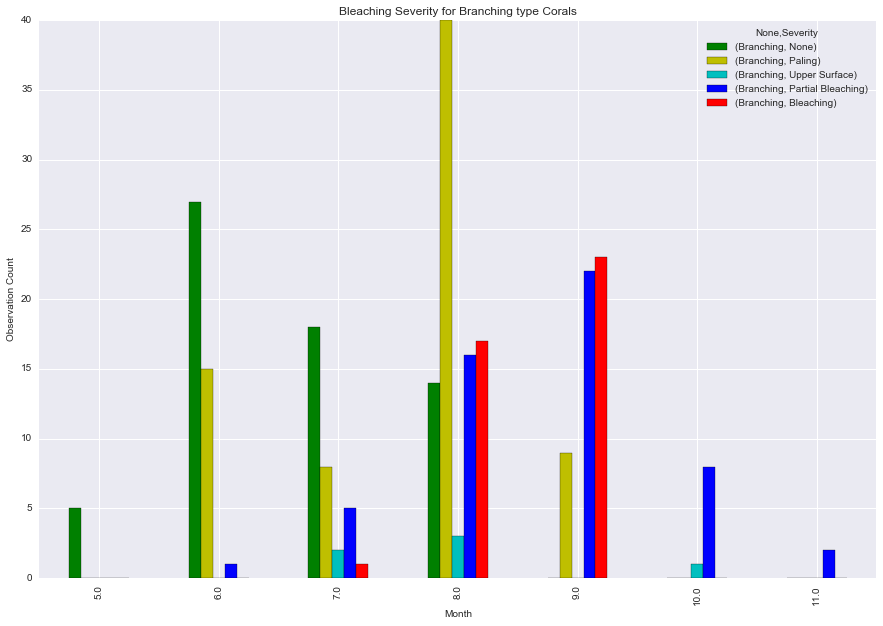

In [15]:
# Plot the output as bar chart for Branching corals
#
b = pvt.plot(kind='bar', title='Bleaching Severity for Branching type Corals', 
             color=['g','y','c','b','r'], figsize=(15,10), legend=True, fontsize=10)
b.set_xlabel("Month", fontsize=10)
b.set_ylabel("Observation Count", fontsize=10)

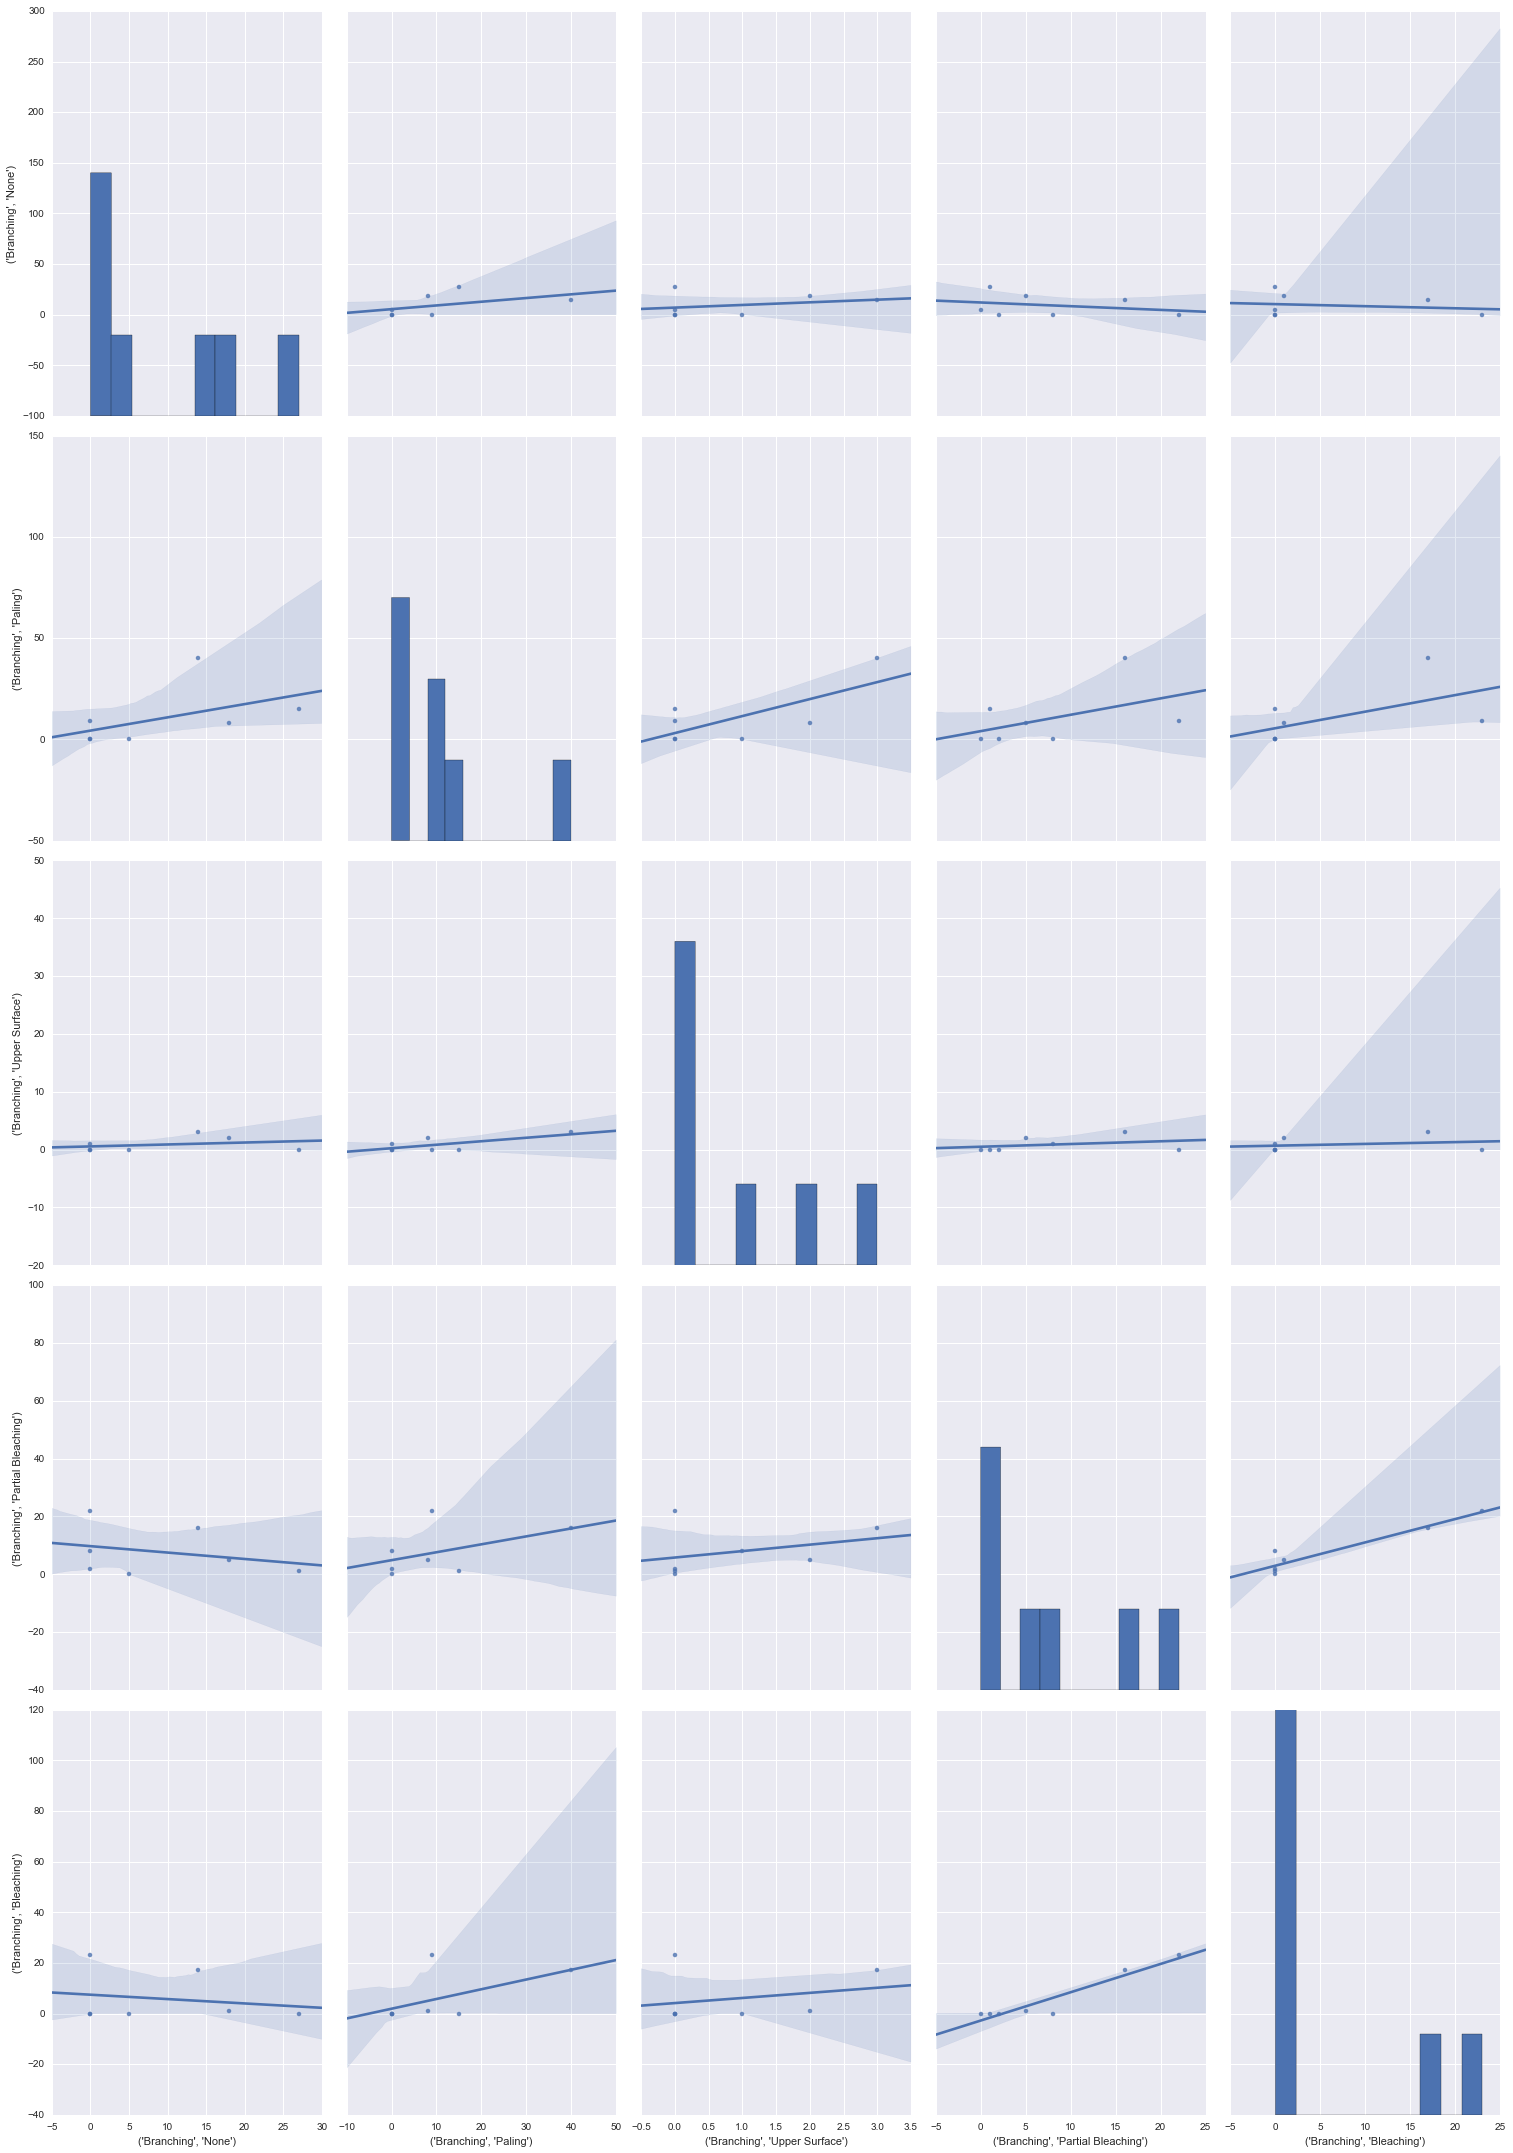

In [18]:
# scatter plot with Reg Expression
sns.pairplot(pvt, size=6, aspect=0.7, kind='reg')

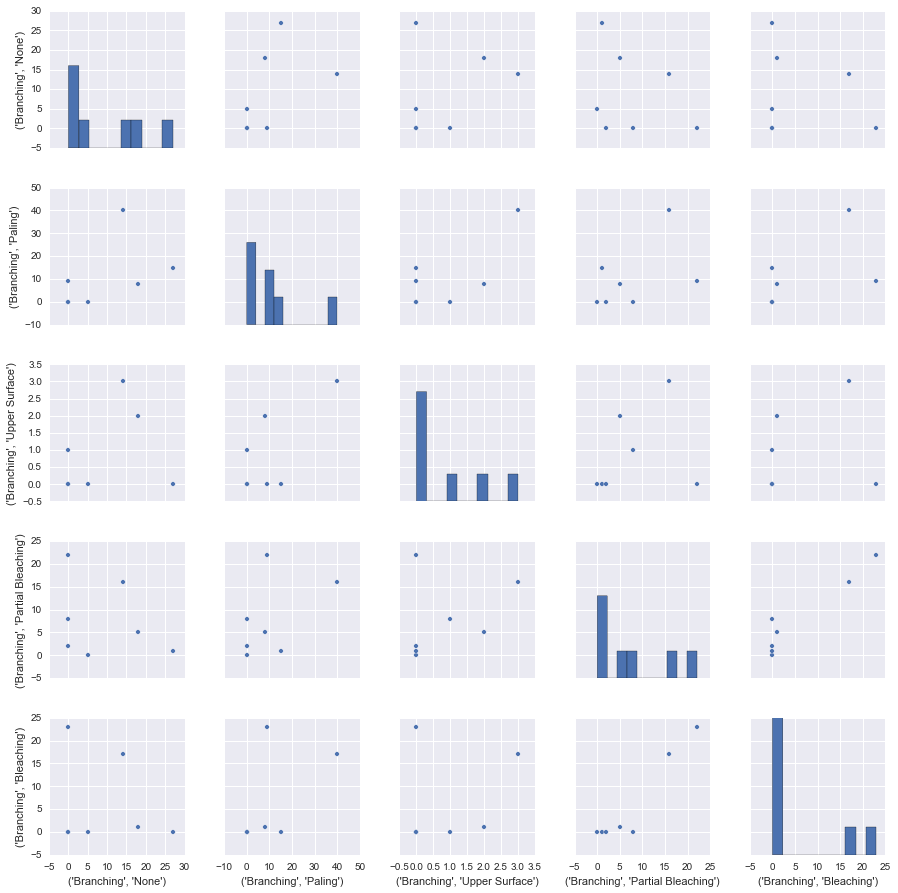

In [21]:
# scatter matrix in Seaborn
sns.pairplot(pvt)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003E397D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003FAD00F0>]], dtype=object)

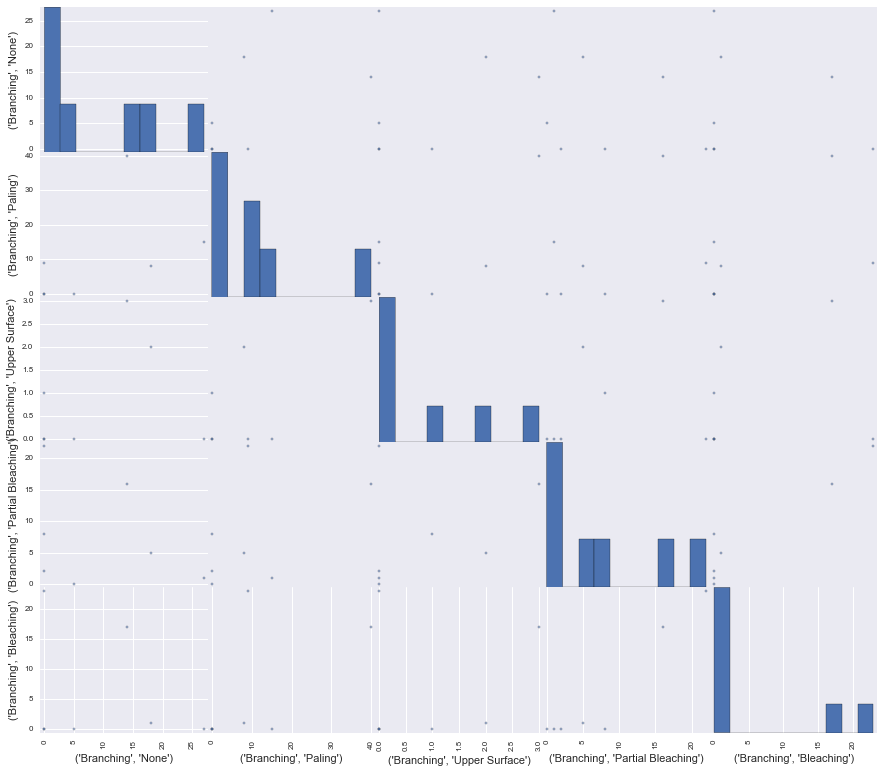

In [26]:
pd.scatter_matrix(pvt, figsize=(15, 13))

In [27]:
pvt.corr()

Branching                          \
Severity                         None    Paling Upper Surface   
          Severity                                              
Branching None               1.000000  0.489762      0.296282   
          Paling             0.489762  1.000000      0.711880   
          Upper Surface      0.296282  0.711880      1.000000   
          Partial Bleaching -0.284790  0.471219      0.324222   
          Bleaching         -0.188224  0.561030      0.249390   

                                                         
Severity                    Partial Bleaching Bleaching  
          Severity                                       
Branching None                      -0.284790 -0.188224  
          Paling                     0.471219  0.561030  
          Upper Surface              0.324222  0.249390  
          Partial Bleaching          1.000000  0.949455  
          Bleaching                  0.949455  1.000000

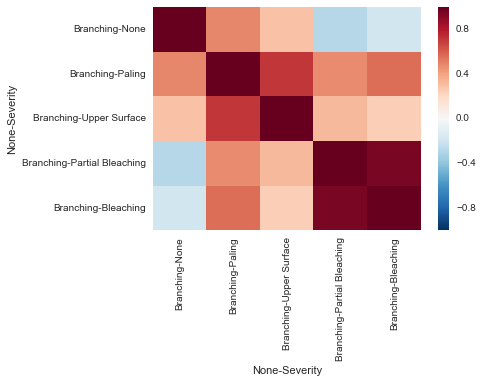

In [28]:
sns.heatmap(pvt.corr())